# Stock Market Prediction And Forecasting Using Stacked LSTM-Task2

# Loading the Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dataset_link = "https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv"
df = pd.read_csv(dataset_link)
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [3]:
df.isnull().sum()
# No null values so we can proceed

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [4]:
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [6]:
df_close = df['Close']
df_close

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

In [7]:
df1 = df.sort_values('Date')
df1.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


# Visualising

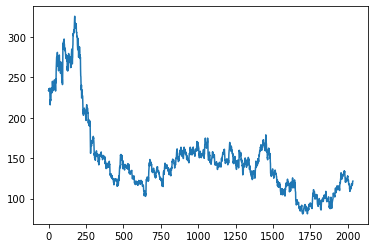

In [8]:
plt.plot(df1['Close'])

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df_close=scaler.fit_transform(np.array(df_close).reshape(-1,1))
df_close

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

# Train and Test Split

In [12]:
training_size=int(len(df_close)*0.75)
test_size=len(df_close)-training_size
train_data,test_data=df_close[0:training_size,:],df_close[training_size:len(df_close),:1]

# Data Preprocessing

In [13]:
import numpy
def create_dataset(dataset, time_step=1):
    dataX,dataY=[],[]
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [14]:
y_train.shape
X_train.shape
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

# LSTM

In [19]:
pip install tensorflow

  Using cached termcolor-1.1.0.tar.gz (3.9 kB)
  Using cached pyasn1_modules-0.2.8-py2.py3-none-any.whl (155 kB)
  Using cached pyasn1-0.4.8-py2.py3-none-any.whl (77 kB)
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4847 sha256=51db01bfd4471a891908e5b1951367a0872c23b866b3428aa2c72c1fc16c8b93
  Stored in directory: c:\users\yasht\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501
Successfully built termcolor
Note: you may need to restart the kernel to use updated packages.


In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [21]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


# Prediction

In [22]:
model.fit(X_train, y_train, validation_split=0.1, epochs= 60, batch_size=64, verbose = 1)

Epoch 1/60
21/21 [==============================] - 8s 146ms/step - loss: 0.0291 - val_loss: 0.0017
Epoch 2/60
21/21 [==============================] - 2s 97ms/step - loss: 0.0035 - val_loss: 0.0017
Epoch 3/60
21/21 [==============================] - 2s 92ms/step - loss: 0.0018 - val_loss: 0.0014
Epoch 4/60
21/21 [==============================] - 2s 93ms/step - loss: 0.0016 - val_loss: 0.0015
Epoch 5/60
21/21 [==============================] - 2s 99ms/step - loss: 0.0015 - val_loss: 0.0012
Epoch 6/60
21/21 [==============================] - 2s 94ms/step - loss: 0.0015 - val_loss: 0.0012
Epoch 7/60
21/21 [==============================] - 2s 107ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 8/60
21/21 [==============================] - 2s 104ms/step - loss: 0.0016 - val_loss: 0.0026
Epoch 9/60
21/21 [==============================] - 2s 112ms/step - loss: 0.0028 - val_loss: 0.0016
Epoch 10/60
21/21 [==============================] - 2s 112ms/step - loss: 0.0015 - val_loss: 0.0013
Epoc

In [23]:
predictions = model.predict(X_test)

In [24]:
# performing inverse transform on predictions
inv_predictions = scaler.inverse_transform(predictions)

In [25]:
inv_predictions

array([[120.74287 ],
       [120.58653 ],
       [120.17225 ],
       [120.05169 ],
       [120.31764 ],
       [121.09063 ],
       [122.368034],
       [123.48064 ],
       [123.55129 ],
       [123.21682 ],
       [122.80342 ],
       [122.24463 ],
       [121.917114],
       [121.75276 ],
       [121.84323 ],
       [122.13776 ],
       [122.52084 ],
       [122.95412 ],
       [123.16601 ],
       [123.47047 ],
       [123.45692 ],
       [122.7602  ],
       [121.769264],
       [121.065315],
       [120.00804 ],
       [118.57148 ],
       [116.88074 ],
       [114.463524],
       [111.584404],
       [108.57481 ],
       [105.68977 ],
       [103.11841 ],
       [101.06456 ],
       [ 99.67581 ],
       [ 98.85716 ],
       [ 98.74506 ],
       [ 99.281075],
       [ 99.95116 ],
       [100.41704 ],
       [100.58569 ],
       [100.55975 ],
       [100.36917 ],
       [100.09412 ],
       [ 99.80736 ],
       [ 99.52534 ],
       [ 99.413315],
       [ 99.4267  ],
       [ 99.2

In [26]:
import math
from sklearn.metrics import mean_squared_error

In [27]:
mse = math.sqrt(mean_squared_error(ytest, predictions))
print("The Mean Squared Error for above model is: ", mse)

The Mean Squared Error for above model is:  0.024502988734461776


In [28]:
math.sqrt(mean_squared_error(ytest,predictions))

0.024502988734461776

In [29]:
temp_input=list(X_test)
temp_input=temp_input[0].tolist()
temp_input

[[0.16217320261437906],
 [0.1597222222222222],
 [0.16278594771241828],
 [0.1734068627450981],
 [0.1417483660130719],
 [0.15441176470588236],
 [0.16503267973856206],
 [0.15563725490196073],
 [0.14460784313725483],
 [0.13684640522875818],
 [0.13582516339869283],
 [0.14072712418300654],
 [0.14501633986928103],
 [0.14195261437908496],
 [0.13562091503267976],
 [0.15053104575163395],
 [0.15727124183006536],
 [0.15461601307189538],
 [0.1576797385620915],
 [0.15114379084967322],
 [0.14297385620915032],
 [0.14215686274509803],
 [0.14787581699346408],
 [0.13970588235294118],
 [0.11642156862745096],
 [0.11131535947712418],
 [0.10927287581699346],
 [0.10334967320261434],
 [0.09783496732026142],
 [0.10089869281045749],
 [0.1090686274509804],
 [0.10171568627450978],
 [0.1125408496732026],
 [0.1270424836601307],
 [0.12214052287581695],
 [0.1270424836601307],
 [0.11519607843137253],
 [0.11008986928104575],
 [0.09967320261437906],
 [0.09640522875816993],
 [0.10089869281045749],
 [0.10886437908496727],
